# Уменьшение количества цветов изображения

Данное задание основано на материалах лекций по методу k-средних (K-Means). Обратите внимание, что задание не является обязательным.
## Вы научитесь:
* использовать алгоритм K-Means
* работать с задачами обучения без учителя
* работать с изображениям в Python

## Введение

Самый распространенный тип задач машинного обучения — это задачи обучения с учителем. В них имеется обучающая выборка, для каждого объекта которой есть ответ, и нужно научиться предсказывать эти ответы для новых объектов. В такой постановке можно строго определить критерии качества.

Если же имеются лишь объекты, а ответов для них нет, то все равно можно пытаться найти в данных некую структуру. Задачи, которые ищут закономерности в неразмеченных выборках, называют задачами обучения без учителя. Типичный пример такой задачи — кластеризация, где требуется найти группы похожих объектов.

Кластеризация может использоваться для самых разных целей. В этом задании мы попробуем группировать схожие пиксели на изображении. Такой подход позволяет переходить к суперпиксельному представлению изображений, которое является более компактным и лучше подходит для решения ряда задач компьютерного зрения.
Реализация в sklearn

Алгоритм `KMeans` реализован в классе `sklearn.cluster.KMeans`. Так как это один из примеров unsupervised-задачи, для обучения достаточно передать только матрицу объектов.

В качестве метрики будем использовать [PSNR](https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio) — адаптация метрики MSE для задачи нахождениях сходства изображений.

Для работы с изображениями мы рекомендуем воспользоваться пакетом scikit-image. Чтобы загрузить изображение, необходимо выполнить следующую команду:
```python
from skimage.io import imread
image = imread('parrots_4.jpg')
```
После этих действий переменная image будет содержать изображение в виде numpy-массива размера `n * m * 3`, где `n` и `m` соответствуют размерам изображения, а `3` соответствует формату представления RGB.

Если вы хотите вывести изображение на экран, необходимо, чтобы у вас была установлена библиотека `matplotlib`. С помощью нее это делается следующим образом:
```python
import pylab
pylab.imshow(image)
```
Если вы работаете в ipython-notebook'е, то вам необходимо перед выполнением кода выше исполнить в любой ячейке инструкцию:
```python
%matplotlib inline
```

Она позволяет выводить изображения прямо в ipython-notebook.
## Инструкция по выполнению
1) Загрузите картинку [parrots.jpg](https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/_3160f0832cf89866f4cc20e07ddf1a67_parrots.jpg?expiry=1583884800000&hmac=XzGNr7FKMJTPhgRARqrOs9mpRuKJv04nrB7tU-tbRv4). Преобразуйте изображение, приведя все значения в интервал от 0 до 1. Для этого можно воспользоваться функцией img_as_float из модуля skimage. Обратите внимание на этот шаг, так как при работе с исходным изображением вы получите некорректный результат.
    

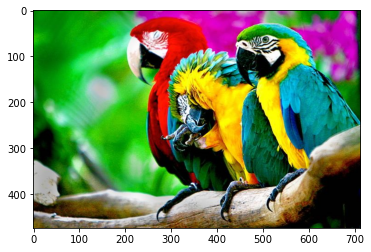

In [1]:
from matplotlib.image import imread
from matplotlib import pyplot as plt
import numpy as np

img = imread('parrots.jpg')
plt.imshow(img)
img = img / 256

2) Создайте матрицу объекты-признаки: характеризуйте каждый пиксель тремя координатами - значениями интенсивности в пространстве RGB.
   

In [2]:
X = img.reshape(-1, 3)

3) Запустите алгоритм K-Means с параметрами init='k-means++' и random_state=241. После выделения кластеров все пиксели, отнесенные в один кластер, попробуйте заполнить двумя способами: медианным и средним цветом по кластеру.
    

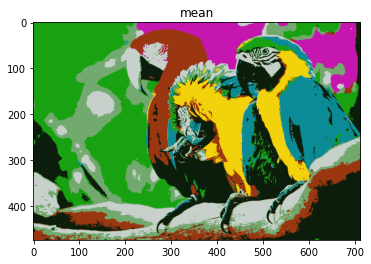

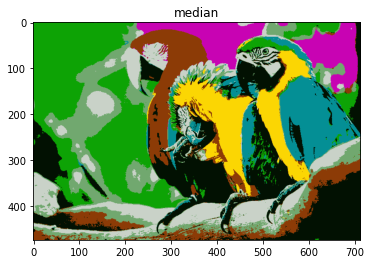

In [3]:
from sklearn.cluster import KMeans

def squeeze_img(img, X, n_clusters):
    model = KMeans(init='k-means++', n_clusters=n_clusters, random_state=241)
    y = model.fit_predict(X)
    clusters = [X[y==i] for i in range(model.n_clusters)]
    clusters_mean = [np.mean(cl, axis=0) for cl in clusters]
    clusters_median = [np.median(cl, axis=0) for cl in clusters]
    img_mean = np.stack(clusters_mean[i] for i in y)
    img_median = np.stack(clusters_median[i] for i in y)
    img_mean = img_mean.reshape(img.shape)
    img_median = img_median.reshape(img.shape)

    return {'mean': img_mean, 'median': img_median}

sq_img = squeeze_img(img, 8)
for t in ['mean', 'median']:
    plt.imshow(sq_img[t])
    plt.title(t)
    plt.show()

4) Измерьте качество получившейся сегментации с помощью метрики [PSNR](https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio). Эту метрику нужно реализовать самостоятельно (см. определение).


In [4]:
def PSNR(original, other):
    mse = np.mean((original - other) ** 2)
    return -10 * np.log10(mse)
    
for t in sq_img:
    print(f'{t}: {PSNR(img, sq_img[t])}')

mean: 18.50214143908152
median: 18.209407113814887


5) Найдите минимальное количество кластеров, при котором значение PSNR выше 20 (можно рассмотреть не более 20 кластеров, но не забудьте рассмотреть оба способа заполнения пикселей одного кластера). Это число и будет ответом в данной задаче.


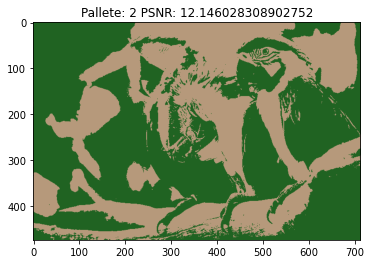

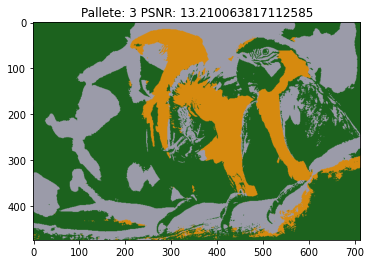

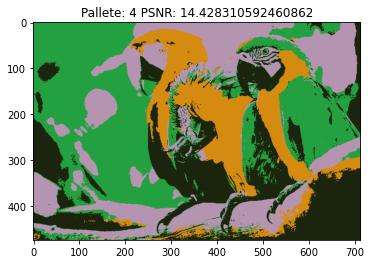

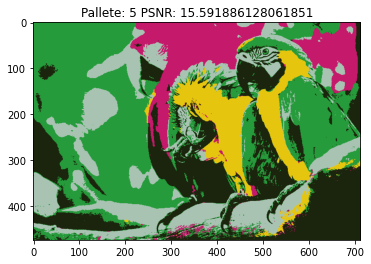

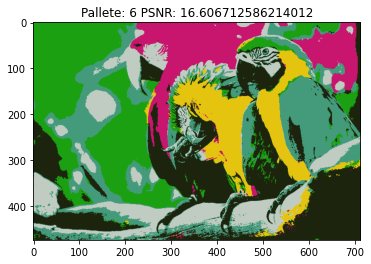

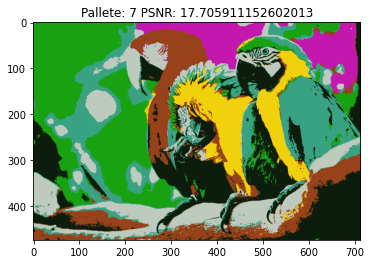

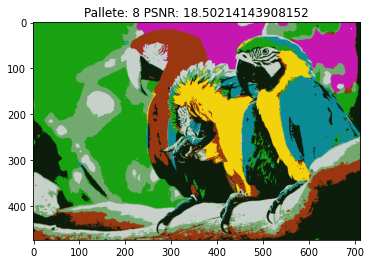

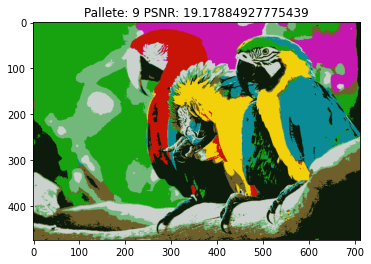

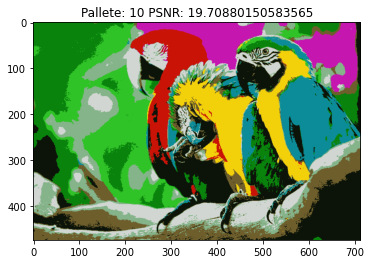

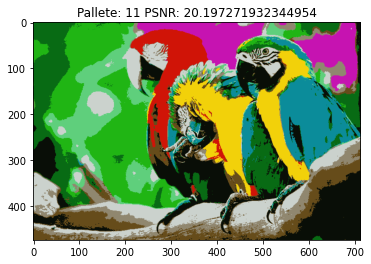

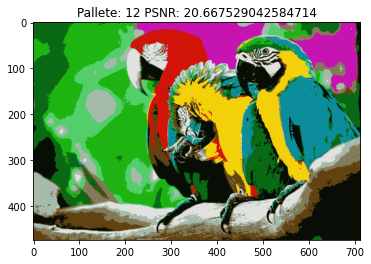

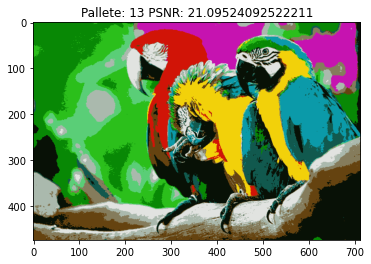

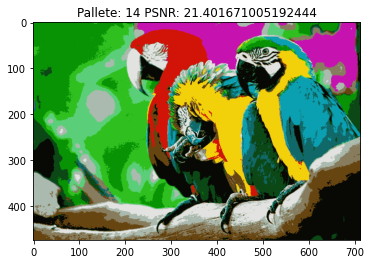

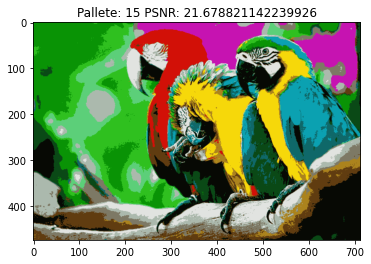

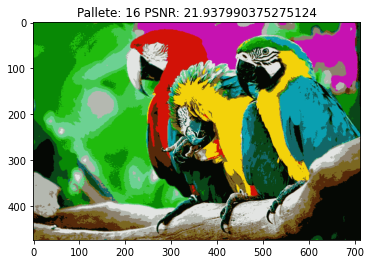

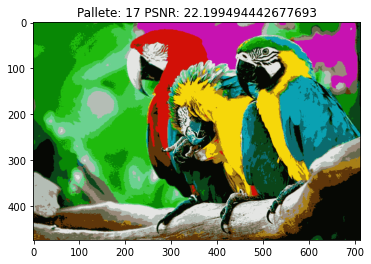

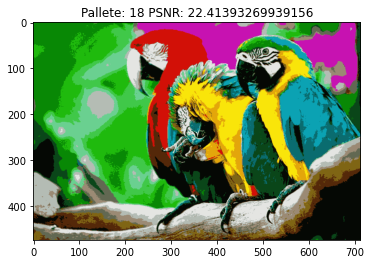

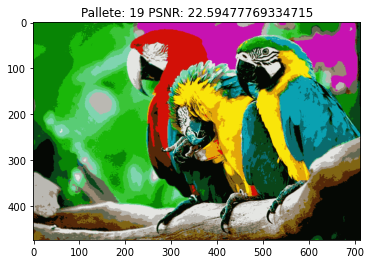

11


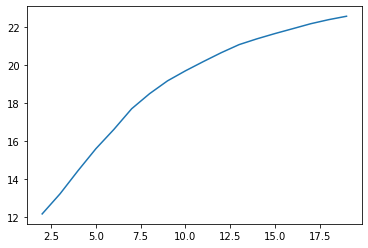

In [5]:
import utils
n_clusters = np.arange(2, 20) 
psnr = np.empty(n_clusters.shape)
for i, c in enumerate(n_clusters):
    sq_img = squeeze_img(img, X, c)
    sq_img = max(sq_img.values(), key=lambda si: PSNR(img, si))
    psnr[i] = PSNR(img, sq_img)
    plt.imshow(sq_img)
    plt.title(F'Pallete: {c} PSNR: {psnr[i]}')
    plt.show()
plt.plot(range(2, 20), psnr)
plt.xlabel('n_clusters')
plt.ylabel('PSNR')
utils.answer('0', f'{np.min(n_clusters[psnr >= 20])}')
print(np.min(n_clusters[psnr >= 20]))